# Cyberbullying detection using machine learining

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

In [2]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [4]:
# read file into pandas using a relative path
import pandas as pd
tweet = pd.read_csv("h.csv", encoding="ISO-8859-1")

In [5]:
# examine the shape
tweet.shape

(19001, 4)

In [6]:
# examine the first 10 rows
tweet.head(10)

,content,annotation__notes,annotation__label__-,extras
0,I hate .... you .... zzzzzzzz,NaN,1,NaN
1,Hey... Stop twitting and post a damn blog!,NaN,1,NaN
2,http://twitpic.com/qtt0 - O.O bingo is waaaaay...,NaN,1,NaN
3,xD! i know. hmm ....i wonder how it feels like...,NaN,1,NaN
4,oh youuuu little bitch. Just keep your winter ...,NaN,1,NaN
5,not to sound amazingly astoundingly gay (not ...,NaN,1,NaN
6,as much as i hate auto-DM's i also check out ...,NaN,1,NaN
7,I'm blocking you because you have no value. Go...,NaN,1,NaN
8,If only Edward and Bella were slightly less em...,NaN,1,NaN
9,@scanman and @asthepumpturns. Yeah I am a mea...,NaN,1,NaN


In [7]:
tweet.rename(columns = {"annotation__label__-": "label", "content": "tweet"}, inplace = True)
tweet.drop(['annotation__notes'], axis = 1, inplace = True)
tweet.drop(['extras'], axis = 1, inplace = True)
tweet.head(10)

,tweet,label
0,I hate .... you .... zzzzzzzz,1
1,Hey... Stop twitting and post a damn blog!,1
2,http://twitpic.com/qtt0 - O.O bingo is waaaaay...,1
3,xD! i know. hmm ....i wonder how it feels like...,1
4,oh youuuu little bitch. Just keep your winter ...,1
5,not to sound amazingly astoundingly gay (not ...,1
6,as much as i hate auto-DM's i also check out ...,1
7,I'm blocking you because you have no value. Go...,1
8,If only Edward and Bella were slightly less em...,1
9,@scanman and @asthepumpturns. Yeah I am a mea...,1


In [8]:
# examine the class distribution
tweet.label.value_counts()

0    11162
1     7839
Name: label, dtype: int64

In [9]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet['tweet'].head()

0                        i hate .... you .... zzzzzzzz
1           hey... stop twitting and post a damn blog!
2    http://twitpic.com/qtt0 - o.o bingo is waaaaay...
3    xd! i know. hmm ....i wonder how it feels like...
4    oh youuuu little bitch. just keep your winter ...
Name: tweet, dtype: object

In [10]:
tweet['tweet'] = tweet['tweet'].str.replace('[^\w\s]','')
tweet['tweet'] = tweet['tweet'].str.replace(r'_','')
tweet['tweet'].head()

0                                i hate  you  zzzzzzzz
1               hey stop twitting and post a damn blog
2    httptwitpiccomqtt0  oo bingo is waaaaay to har...
3    xd i know hmm i wonder how it feels like to fu...
4    oh youuuu little bitch just keep your winter g...
Name: tweet, dtype: object

In [11]:
tweet['numerics'] = tweet['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweet[['tweet','numerics']].head(10)

,tweet,numerics
0,i hate you zzzzzzzz,0
1,hey stop twitting and post a damn blog,0
2,httptwitpiccomqtt0 oo bingo is waaaaay to har...,0
3,xd i know hmm i wonder how it feels like to fu...,0
4,oh youuuu little bitch just keep your winter g...,0
5,not to sound amazingly astoundingly gay not th...,0
6,as much as i hate autodms i also check out lin...,0
7,im blocking you because you have no value go b...,0
8,if only edward and bella were slightly less emo,0
9,scanman and asthepumpturns yeah i am a mean me...,0


In [12]:
tweet['tweet'] = tweet['tweet'].str.replace('[\d+]','')
tweet['tweet'].head()

0                                i hate  you  zzzzzzzz
1               hey stop twitting and post a damn blog
2    httptwitpiccomqtt  oo bingo is waaaaay to hard...
3    xd i know hmm i wonder how it feels like to fu...
4    oh youuuu little bitch just keep your winter g...
Name: tweet, dtype: object

In [13]:
stop = stopwords.words('english')
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweet['tweet'].head()

0                                        hate zzzzzzzz
1                     hey stop twitting post damn blog
2    httptwitpiccomqtt oo bingo waaaaay hard hate w...
3    xd know hmm wonder feels like fuck bingo hard ...
4    oh youuuu little bitch keep winter gloves away...
Name: tweet, dtype: object

In [14]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))
tweet['tweet'].head()

0                                        hate zzzzzzzz
1                     hey stop twitting post damn blog
2    httptwitpiccomqtt bingo waaaaay hard hate wann...
3    know hmm wonder feels like fuck bingo hard hmm...
4    youuuu little bitch keep winter gloves away zi...
Name: tweet, dtype: object

In [15]:
#tweet['tweet'].apply(lambda x: str(TextBlob(x).correct()))
#tweet['tweet'].head()

In [16]:
freq = pd.Series(' '.join(tweet['tweet']).split()).value_counts()[:10]
freq = list(freq.index)
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweet.head(10)

,tweet,label,numerics
0,zzzzzzzz,1,0
1,hey stop twitting post blog,1,0
2,httptwitpiccomqtt bingo waaaaay hard wanna itw...,1,0
3,know hmm wonder feels bingo hard hmmmm guss il...,1,0
4,youuuu little bitch keep winter gloves away zi...,1,0
5,sound amazingly astoundingly gay thats bad sou...,1,0
6,much autodms also check links theyre music rel...,1,0
7,blocking value back telemarketing loser market...,1,0
8,edward bella slightly less emo,1,0
9,scanman asthepumpturns yeah mean mean person h...,1,0


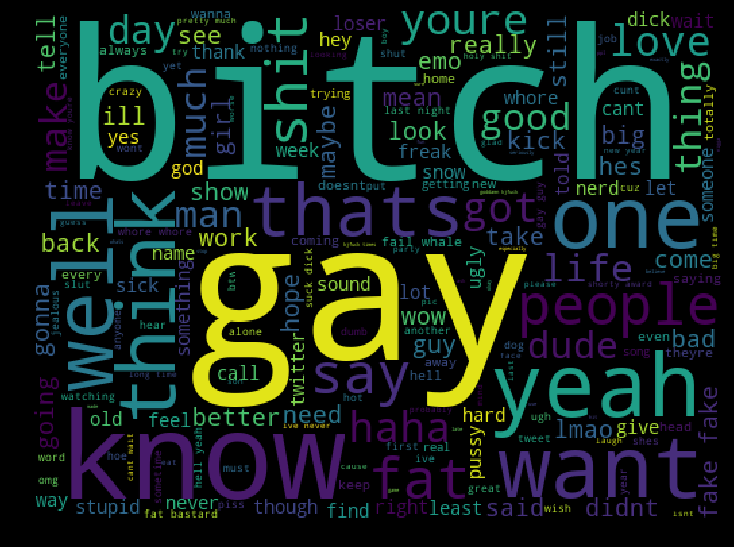

In [17]:
bully_words = ' '.join(list(tweet[tweet['label'] == 1]['tweet']))
bully_wc = WordCloud(width = 512,height = 380).generate(bully_words)
plt.figure(figsize = (10, 8), facecolor = (0, 0, 0))
plt.imshow(bully_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

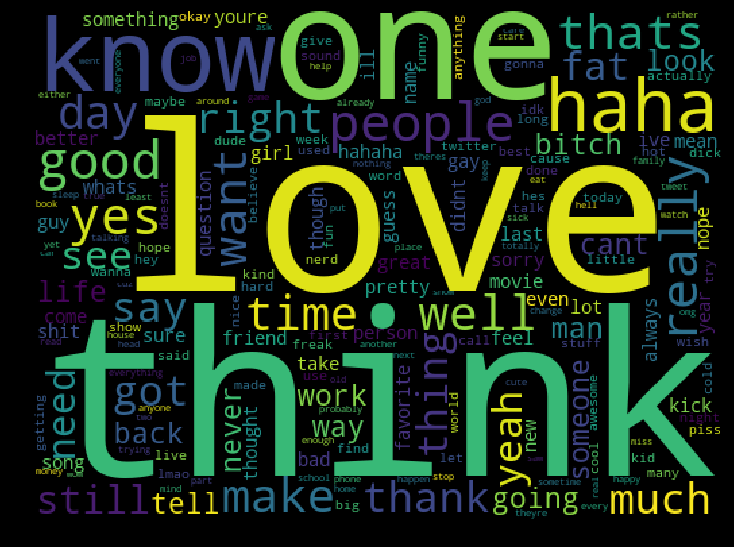

In [18]:
non_bully_words = ' '.join(list(tweet[tweet['label'] == 0]['tweet']))
non_bully_wc = WordCloud(width = 512,height = 380).generate(non_bully_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_bully_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [19]:
# how to define X and y (from the Tweeter data) for use with COUNTVECTORIZER
X = tweet.tweet
y = tweet.label
print(X.shape)
print(y.shape)

(19001,)
(19001,)


In [20]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15200,)
(3801,)
(15200,)
(3801,)


C:\Users\Richie Rozario\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
def tokenize(tweet):
    words = word_tokenize(tweet)
    
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]
    
    return words

In [22]:
# instantiate the vectorizer
#args = {"stem": True, "lemmatize": False}
vect = CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        encoding='ISO-8859-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=tokenize, vocabulary=None)
#vect =  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        #encoding='ISO-8859-1', input='content',
        #lowercase=True, max_df=1.0, max_features=None, min_df=1,
        #ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        #stop_words='english', strip_accents=None, sublinear_tf=False,
        #token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=tokenize, use_idf=True,
        #vocabulary=None)
#vect = HashingVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='ISO-8859-1',
        input='content', lowercase=True, max_df=1.0, max_features=None,
        min_df=1, ngram_range=(1, 2), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x000001EF971430D0>,
        vocabulary=None)

In [23]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [24]:
# examine the document-term matrix
X_train_dtm


<15200x56501 sparse matrix of type '<class 'numpy.int64'>'
	with 144558 stored elements in Compressed Sparse Row format>

In [25]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(X_test_dtm)

  (0, 3658)	1
  (0, 3690)	1
  (0, 10902)	1
  (0, 11028)	1
  (0, 11033)	1
  (0, 14873)	1
  (0, 14878)	1
  (0, 27248)	1
  (0, 27260)	1
  (0, 31712)	1
  (0, 31716)	1
  (0, 35257)	1
  (0, 35260)	1
  (0, 55120)	2
  (0, 55135)	1
  (0, 55139)	1
  (1, 6297)	1
  (1, 13204)	1
  (1, 15285)	1
  (1, 15337)	1
  (1, 35493)	1
  (1, 35494)	1
  (1, 48065)	1
  (1, 48109)	1
  (2, 10451)	2
  :	:
  (3796, 24747)	1
  (3796, 41943)	1
  (3796, 41946)	1
  (3796, 42375)	1
  (3796, 42420)	1
  (3796, 45249)	1
  (3796, 45300)	1
  (3796, 52209)	1
  (3796, 52268)	1
  (3797, 35555)	1
  (3797, 53537)	1
  (3797, 53561)	1
  (3798, 12323)	1
  (3798, 15901)	1
  (3798, 18360)	1
  (3798, 20404)	1
  (3798, 24527)	1
  (3798, 48255)	1
  (3798, 54191)	1
  (3799, 10443)	1
  (3799, 40460)	1
  (3800, 7855)	1
  (3800, 7869)	1
  (3800, 14075)	1
  (3800, 14391)	1


In [26]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [27]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 8.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [29]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8560905024993423

In [30]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1915,  316],
       [ 231, 1339]], dtype=int64)

In [31]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.89      0.86      0.88      2231
          1       0.81      0.85      0.83      1570

avg / total       0.86      0.86      0.86      3801



In [32]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.99981589, 0.00652708, 0.99977886, ..., 0.80326038, 0.16901669,
       0.19361815])

In [33]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9410969346241581

In [34]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
# train the model using X_train_dtm
%time lr.fit(X_train_dtm, y_train)

Wall time: 306 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# make class predictions for X_test_dtm
y_pred_class = lr.predict(X_test_dtm)

In [37]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = lr.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.93371134, 0.0418717 , 0.79091657, ..., 0.315128  , 0.18587099,
       0.19622712])

In [38]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.8718758221520653

In [39]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2017,  214],
       [ 273, 1297]], dtype=int64)

In [40]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      2231
          1       0.86      0.83      0.84      1570

avg / total       0.87      0.87      0.87      3801



In [41]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9335011576882778

In [42]:
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier(weights='distance', n_neighbors=2)  
%time kn.fit(X_train_dtm, y_train)

Wall time: 8 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [43]:
y_pred_class = kn.predict(X_test_dtm)

In [44]:
metrics.accuracy_score(y_test, y_pred_class)

0.8905551170744541

In [45]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2037,  194],
       [ 222, 1348]], dtype=int64)

In [46]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.90      0.91      0.91      2231
          1       0.87      0.86      0.87      1570

avg / total       0.89      0.89      0.89      3801



In [47]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9335011576882778

In [48]:
from sklearn import tree
dc = tree.DecisionTreeClassifier(criterion='entropy')
%time dc.fit(X_train_dtm, y_train)

Wall time: 13.4 s


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
y_pred_class = dc.predict(X_test_dtm)

In [50]:
metrics.accuracy_score(y_test, y_pred_class)

0.8450407787424362

In [51]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1804,  427],
       [ 162, 1408]], dtype=int64)

In [52]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.92      0.81      0.86      2231
          1       0.77      0.90      0.83      1570

avg / total       0.86      0.85      0.85      3801



In [53]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9335011576882778

In [54]:
from sklearn import svm
svl = svm.LinearSVC()
%time svl.fit(X_train_dtm, y_train)

Wall time: 951 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
y_pred_class = svl.predict(X_test_dtm)

In [56]:
metrics.accuracy_score(y_test, y_pred_class)

0.8789792159957905

In [57]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1963,  268],
       [ 192, 1378]], dtype=int64)

In [58]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.91      0.88      0.90      2231
          1       0.84      0.88      0.86      1570

avg / total       0.88      0.88      0.88      3801



In [59]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9335011576882778

In [60]:
sv = svm.SVC(gamma = 10)
%time sv.fit(X_train_dtm, y_train)

Wall time: 1min 26s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
y_pred_class = sv.predict(X_test_dtm)

In [62]:
metrics.accuracy_score(y_test, y_pred_class)

0.9376479873717443

In [63]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2205,   26],
       [ 211, 1359]], dtype=int64)

In [64]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      2231
          1       0.98      0.87      0.92      1570

avg / total       0.94      0.94      0.94      3801



## Examining a model for further insight


In [65]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

56501

In [66]:
# first 10 false positives (Nonbullying materials classified as bullying)
X_test[y_test < y_pred_class].head(10)

10443    fairr enough putting bitch though
9520                     thats sounds good
7588                             emo becka
15592                                  fat
12525                                  try
12736        lmao nawdats elementary daysz
8427                              straight
10331                          sounds good
16450                                  wow
6013                 smart httpthetysercom
Name: tweet, dtype: object

In [67]:
# first 10 false negatives (bullying materials classified as nonbullying)
X_test[y_test > y_pred_class].head(10)

757                                        ill fight bitch
568                             ajula fukin talk herrr vvv
43                                  still got whooped haha
558                                                asshole
1710                                                  name
4644                                                      
3673                                                      
200                                                    hey
17285    dream involving rhino chasing polo cologne eve...
5816                                                      
Name: tweet, dtype: object

In [68]:
# examine the first 100 tokens
print(X_train_tokens[0:100])

['aaaaaaaaaa', 'aaaaaanndgummi', 'aaaaaanndgummi bear', 'aaaagh', 'aaaawwwww', 'aaaawwwww rock', 'aaand', 'aaand needa', 'aaanyyywhoooooooo', 'aaanyyywhoooooooo uuuhm', 'aaargh', 'aaarrrg', 'aah', 'aah actual', 'aah butttt', 'aah twitorfitcom', 'aardvark', 'aardvark discont', 'aargh', 'aargh big', 'aaron', 'aaron need', 'aaronag', 'aaronag sure', 'aarontait', 'aarontait come', 'aawwhh', 'aawwhh wake', 'aay', 'aay richard', 'abandon', 'abandon alon', 'abbey', 'abbey bier', 'abbi', 'abbi aint', 'abcd', 'abcd right', 'abcdefghijklmnopqrstuvwxyz', 'abcdefghijklmnopqrstuvwxyz pick', 'abduct', 'abduct alien', 'abid', 'abid famili', 'abil', 'abil breath', 'abil busi', 'abil chang', 'abil fli', 'abil immov', 'abil kick', 'abil print', 'abil spell', 'abil turn', 'abil work', 'abl', 'abl act', 'abl bare', 'abl bath', 'abl chang', 'abl connect', 'abl control', 'abl drive', 'abl fli', 'abl half', 'abl ive', 'abl know', 'abl make', 'abl park', 'abl pull', 'abl resist', 'abl retriev', 'abl spend', '

In [69]:
# examine the last 100 tokens
print(X_train_tokens[-100:])

['yuuu moreep', 'yuuuaaa', 'yuuuaaa akekek', 'yuuuuuuu', 'yvett', 'yvett restaur', 'yvonn', 'yvonn french', 'yvonn littl', 'ywan', 'ywan lmao', 'yyyessss', 'yyyessss way', 'yyyyou', 'yyyyou love', 'zac', 'zac efron', 'zach', 'zach tell', 'zacki', 'zacki sorri', 'zackli', 'zackli thing', 'zak', 'zak come', 'zaxbi', 'zaxbi diet', 'zco', 'zealand', 'zealand lmao', 'zebra', 'zebra cross', 'zebra lovee', 'zebra man', 'zee', 'zee hair', 'zeno', 'zeno finalist', 'zero', 'zero absolut', 'zero alright', 'zero long', 'zerooooo', 'zew', 'zew zealand', 'zig', 'zig idri', 'zimbabw', 'zimbabw nyc', 'zip', 'zip cours', 'zip fat', 'zipper', 'zipper peopl', 'zipper sure', 'zippo', 'zippo fuel', 'zit', 'zit chin', 'zit wtf', 'zodiac', 'zodiac sign', 'zombi', 'zombi believ', 'zombi cruel', 'zombi eat', 'zombi flick', 'zombi freak', 'zombi haha', 'zombi mummi', 'zombi sho', 'zomgon', 'zomgz', 'zomgz fontfe', 'zon', 'zon raar', 'zone', 'zone bitch', 'zone shoot', 'zone space', 'zone usual', 'zoom', 'zoom b

In [70]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[1., 1., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 3., 0., 0.]])

In [71]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 56501)

In [72]:
# number of times each token appears across all Nonbullying messages
nonbullying_token_count = nb.feature_count_[0, :]
nonbullying_token_count

array([1., 1., 1., ..., 0., 1., 1.])

In [73]:
# number of times each token appears across all Bullying messages
bullying_token_count = nb.feature_count_[1, :]
bullying_token_count

array([0., 0., 0., ..., 3., 0., 0.])

In [74]:
# create a DataFrame of tokens with their separate counts
tokens = pd.DataFrame({'token':X_train_tokens, 'Nonbullying':nonbullying_token_count, 'Bullying':bullying_token_count})
tokens.head(10)

,token,Nonbullying,Bullying
0,aaaaaaaaaa,1.0,0.0
1,aaaaaanndgummi,1.0,0.0
2,aaaaaanndgummi bear,1.0,0.0
3,aaaagh,1.0,0.0
4,aaaawwwww,1.0,0.0
5,aaaawwwww rock,1.0,0.0
6,aaand,0.0,2.0
7,aaand needa,0.0,2.0
8,aaanyyywhoooooooo,1.0,0.0
9,aaanyyywhoooooooo uuuhm,1.0,0.0


In [75]:
# examine 10 random DataFrame rows
tokens.sample(10, random_state=100)

,token,Nonbullying,Bullying
11661,didnt number,1.0,0.0
15288,favorit birthday,1.0,0.0
37728,prob fix,1.0,0.0
43793,social jjust,1.0,0.0
20594,hard trust,1.0,0.0
12685,drop hit,1.0,0.0
40430,rollerblad mile,1.0,0.0
48951,til open,0.0,3.0
8241,cloth grab,1.0,0.0
35035,pain rearend,0.0,1.0


In [76]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([8931., 6269.])

In [77]:
# add 1 to counts to avoid dividing by 0
tokens['Nonbullying'] = tokens.Nonbullying + 1
tokens['Bullying'] = tokens.Bullying + 1
tokens.sample(10, random_state=100)

,token,Nonbullying,Bullying
11661,didnt number,2.0,1.0
15288,favorit birthday,2.0,1.0
37728,prob fix,2.0,1.0
43793,social jjust,2.0,1.0
20594,hard trust,2.0,1.0
12685,drop hit,2.0,1.0
40430,rollerblad mile,2.0,1.0
48951,til open,1.0,4.0
8241,cloth grab,2.0,1.0
35035,pain rearend,1.0,2.0


In [78]:
# convert the bullying and non bullying counts into frequencies
tokens['Nonbullying'] = tokens.Nonbullying / nb.class_count_[0]
tokens['Bullying'] = tokens.Bullying / nb.class_count_[1]
tokens.sample(10, random_state=100)

,token,Nonbullying,Bullying
11661,didnt number,0.000224,0.000160
15288,favorit birthday,0.000224,0.000160
37728,prob fix,0.000224,0.000160
43793,social jjust,0.000224,0.000160
20594,hard trust,0.000224,0.000160
12685,drop hit,0.000224,0.000160
40430,rollerblad mile,0.000224,0.000160
48951,til open,0.000112,0.000638
8241,cloth grab,0.000224,0.000160
35035,pain rearend,0.000112,0.000319


In [79]:
# calculate the ratio of bullying for each token
tokens['Bullying_ratio'] = tokens.Bullying / tokens.Nonbullying
random_tokens = tokens.sample(10, random_state=100)

[Text(0,0.5,'Tokens'), Text(0.5,0,'Bullying ratio')]

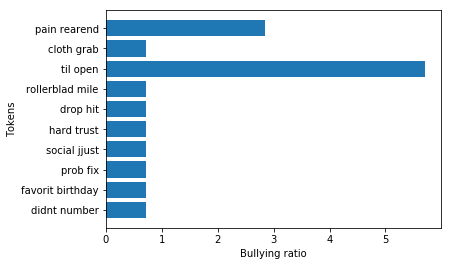

In [80]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
#tokens = tokens.sort_values('Bullying_ratio', ascending=False)
fig, ax = plt.subplots()
ax.barh(random_tokens['token'], random_tokens['Bullying_ratio'])
ax.set(xlabel='Bullying ratio', ylabel='Tokens')

In [81]:
sample_test = ["You are so dumb", "I feel proud of you" ]

In [82]:
sample_test_dtm = vect.transform(sample_test)
print(sample_test_dtm)

  (0, 12951)	1
  (1, 15442)	1
  (1, 38010)	1


In [83]:
print(X_train_tokens[37531])

pretti crappi


In [84]:
sample_pred_nb = nb.predict(sample_test_dtm)
sample_pred_lr = lr.predict(sample_test_dtm)
sample_pred_kn = kn.predict(sample_test_dtm)
sample_pred_dc = dc.predict(sample_test_dtm)
sample_pred_svl = svl.predict(sample_test_dtm)
sample_pred_sv = sv.predict(sample_test_dtm)

In [85]:
print("naive bayes predicted:           ",sample_pred_nb)
print("logistic regression predicted:   ",sample_pred_nb)
print("k-nearest neighbours predicted:  ",sample_pred_nb)
print("decision tree predicted:         ",sample_pred_nb)
print("linear support vector predicted: ",sample_pred_nb)
print("rbf support vector predicted:    ",sample_pred_nb)

naive bayes predicted:            [1 0]
logistic regression predicted:    [1 0]
k-nearest neighbours predicted:   [1 0]
decision tree predicted:          [1 0]
linear support vector predicted:  [1 0]
rbf support vector predicted:     [1 0]
